In [16]:
import numpy as np
from numpy.random import default_rng

import matplotlib.pyplot as plt
from tqdm import tqdm_notebook as tqdm

from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.svm import LinearSVC
from sklearn.linear_model import SGDClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import AdaBoostClassifier
from sklearn.gaussian_process import GaussianProcessClassifier
from sklearn.gaussian_process.kernels import RBF

from sklearn.model_selection import train_test_split
from sklearn.model_selection import RandomizedSearchCV
import warnings
warnings.filterwarnings('ignore') 

In [17]:
from sklearn.datasets import fetch_covtype
X, Y = fetch_covtype(return_X_y=True)

In [18]:
from sklearn.datasets import load_iris
iris = load_iris()
X = iris.data
Y = iris.target

In [19]:
print(len(X[0]))
print(len(Y))

4
150


In [20]:
def GenerateTrainAndTestDataset(X, Y, test_ratio):
    X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_ratio)

In [21]:
def SearchForBestClfUsingRandomCV(X, Y, Classifier_Search):
    params = {}
    searcher_CV = RandomizedSearchCV(Classifier_Search, scoring='average_precision', cv=10, n_iter=10, param_distributions=params,
                            refit=True, n_jobs=-1)
    searcher_CV.fit(X, Y)
    clf_best = searcher_CV.best_estimator_
    
    return clf_best

In [22]:
def TestAccurayOnDataset(X, Y, num_trials, test_size_ratio):
    
    dict_estimator = {}
    dict_estimator['LinearRegression'] = {'train': [], 'test': []}
    dict_estimator['SGD'] = {'train': [], 'test': []}
    dict_estimator['LogisticRegression'] = {'train': [], 'test': []}
    dict_estimator['LinearSVC'] = {'train': [], 'test': []}

    dict_estimator['GaussianNB'] = {'train': [], 'test': []}
    dict_estimator['AdaBoost'] = {'train': [], 'test': []}
    dict_estimator['RandomForest'] = {'train': [], 'test': []}
    dict_estimator['GaussianProcess'] = {'train': [], 'test': []}

    dict_estimator['NeuralNetwork'] = {'train': [], 'test': []}

    
    for i_trial in range(0, num_trials):
        
        X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=test_size_ratio)
#         print(i_trial)
        
        Classifier_LogReg = LogisticRegression(fit_intercept=True)
#         clf_LogReg = SearchForBestClfUsingRandomCV(X_train, Y_train, Classifier_LogReg)
        clf_LogReg = Classifier_LogReg.fit(X_train, Y_train)
        score_LogReg_Train = clf_LogReg.score(X_train, Y_train)
        score_LogReg_Test = clf_LogReg.score(X_test, Y_test)
        
        dict_estimator['LogisticRegression']['train'].append(score_LogReg_Train)
        dict_estimator['LogisticRegression']['test'].append(score_LogReg_Test)
        
#         print("LogReg Done")
        
        Classifier_RF = RandomForestClassifier()
#         clf_RF = SearchForBestClfUsingRandomCV(X_train, Y_train, Classifier_RF)
        clf_RF = Classifier_RF.fit(X_train, Y_train)
        score_RF_Train = clf_RF.score(X_train, Y_train)
        score_RF_Test = clf_RF.score(X_test, Y_test)
        
        dict_estimator['RandomForest']['train'].append(score_RF_Train)
        dict_estimator['RandomForest']['test'].append(score_RF_Test)
        
        Classifier_NN = MLPClassifier(hidden_layer_sizes=(5,2,2))
#        clf_NN = SearchForBestClfUsingRandomCV(X_train, Y_train, Classifier_NN)
        clf_NN = Classifier_NN.fit(X_train, Y_train)
        score_NN_Train = clf_NN.score(X_train, Y_train)
        score_NN_Test = clf_NN.score(X_test, Y_test)
        
        dict_estimator['NeuralNetwork']['train'].append(score_NN_Train)
        dict_estimator['NeuralNetwork']['test'].append(score_NN_Test)
        
        Classifier_LinearSVC = LinearSVC()
#        clf_LinearSVC = SearchForBestClfUsingRandomCV(X_train, Y_train, Classifier_LinearSVC)
        clf_LinearSVC = Classifier_LinearSVC.fit(X_train, Y_train)
        score_LinearSVC_Train = clf_LinearSVC.score(X_train, Y_train)
        score_LinearSVC_Test = clf_LinearSVC.score(X_test, Y_test)
        
        dict_estimator['LinearSVC']['train'].append(score_LinearSVC_Train)
        dict_estimator['LinearSVC']['test'].append(score_LinearSVC_Test)
        
        Classifier_SGD = SGDClassifier()
#        clf_SGD = SearchForBestClfUsingRandomCV(X_train, Y_train, Classifier_SGD)
        clf_SGD = Classifier_SGD.fit(X_train, Y_train)
        score_SGD_Train = clf_SGD.score(X_train, Y_train)
        score_SGD_Test = clf_SGD.score(X_test, Y_test)
        
        dict_estimator['SGD']['train'].append(score_SGD_Train)
        dict_estimator['SGD']['test'].append(score_SGD_Test)
        
        Classifier_GaussianNB = GaussianNB()
#        clf_GaussianNB = SearchForBestClfUsingRandomCV(X_train, Y_train, Classifier_GaussianNB)
        clf_GaussianNB = Classifier_GaussianNB.fit(X_train, Y_train)
        score_GaussianNB_Train = clf_GaussianNB.score(X_train, Y_train)
        score_GaussianNB_Test = clf_GaussianNB.score(X_test, Y_test)
        
        dict_estimator['GaussianNB']['train'].append(score_GaussianNB_Train)
        dict_estimator['GaussianNB']['test'].append(score_GaussianNB_Test)
        
        Classifier_LinearRegression = LinearRegression()
#        clf_LinearRegression = SearchForBestClfUsingRandomCV(X_train, Y_train, Classifier_LinearRegression)
        clf_LinearRegression = Classifier_LinearRegression.fit(X_train, Y_train)
        score_LinearRegression_Train = clf_LinearRegression.score(X_train, Y_train)
        score_LinearRegression_Test = clf_LinearRegression.score(X_test, Y_test)
        
        dict_estimator['LinearRegression']['train'].append(score_LinearRegression_Train)
        dict_estimator['LinearRegression']['test'].append(score_LinearRegression_Test)
        
        Classifier_AdaBoost = AdaBoostClassifier()
#        clf_AdaBoost = SearchForBestClfUsingRandomCV(X_train, Y_train, Classifier_AdaBoost)
        clf_AdaBoost = Classifier_AdaBoost.fit(X_train, Y_train)
        score_AdaBoost_Train = clf_AdaBoost.score(X_train, Y_train)
        score_AdaBoost_Test = clf_AdaBoost.score(X_test, Y_test)
        
        dict_estimator['AdaBoost']['train'].append(score_AdaBoost_Train)
        dict_estimator['AdaBoost']['test'].append(score_AdaBoost_Test)

        kernel = 1.0 * RBF(1.0)
        Classifier_GP = GaussianProcessClassifier(kernel=kernel,random_state=0)
#        clf_GP = SearchForBestClfUsingRandomCV(X_train, Y_train, Classifier_GP)
        clf_GP = Classifier_GP.fit(X_train, Y_train)
        score_GP_Train = clf_GP.score(X_train, Y_train)
        score_GP_Test = clf_GP.score(X_test, Y_test)
        
        dict_estimator['GaussianProcess']['train'].append(score_GP_Train)
        dict_estimator['GaussianProcess']['test'].append(score_GP_Test)

#         print("RF Done")
#         print(i_trial)
        
#         score_LinReg = GenerateFaultScore()
#         score_SGD = GenerateFaultScore()
#         score_LinSVM = GenerateFaultScore()
#         score_GNB = GenerateFaultScore()
#         score_Ada = GenerateFaultScore()
#         score_GP = GenerateFaultScore()
#         score_NN = GenerateFaultScore()
        
#         dict_estimator['LinearRegression'].append(score_LinReg)
#         dict_estimator['SGD'].append(score_SGD)
#         dict_estimator['LinearSVM'].append(score_LinSVM)
#         dict_estimator['GaussianNaiveBayes'].append(score_GNB)
#         dict_estimator['AdaBoost'].append(score_Ada)
#         dict_estimator['GaussianProcess'].append(score_GP)
#         dict_estimator['NeuralNetwork'].append(score_NN)
     
    return dict_estimator
    

In [23]:
def PlotResults(list_trials, dict_train, dict_test):
    
    for key in dict_train.keys():
        plt.plot(list_trials, dict_train[key], '--', label=key+"Train")
        plt.plot(list_trials, dict_test[key], label=key+"Test")
        
    plt.legend(bbox_to_anchor=(1.05, 1.0))

In [24]:
# dict_estimator_real = TestAccurayOnDataset(dataset, num_trials)
# dict_estimator_k = TestAccurayOnDataset(dataset, num_trials)
# dict_estimator_bin = TestAccurayOnDataset(dataset, num_trials)

list_trials = np.arange(100,1100,100)

list_trials = np.arange(1,5,1)
# print(list_trials)

test_size_ratio = 0.3333

list_keys = ['LogisticRegression', 'RandomForest','NeuralNetwork','LinearSVC','SGD','GaussianNB','LinearRegression','AdaBoost']

dict_train_mean = {var: [] for var in list_keys}
dict_train_std = {var: [] for var in list_keys}

dict_test_mean = {var: [] for var in list_keys}
dict_test_std = {var: [] for var in list_keys}

for num_trials in tqdm(list_trials):
#     print(num_trials)
    dict_estimator = TestAccurayOnDataset(X, Y, num_trials, test_size_ratio)
    
    for key in dict_estimator.keys():
        
        if(key in dict_train_mean):
            dict_train_mean[key].append(np.mean(dict_estimator[key]['train']))
            dict_train_std[key].append(np.std(dict_estimator[key]['train']))

            dict_test_mean[key].append(np.mean(dict_estimator[key]['test']))
            dict_test_std[key].append(np.std(dict_estimator[key]['test']))


  0%|          | 0/4 [00:00<?, ?it/s]

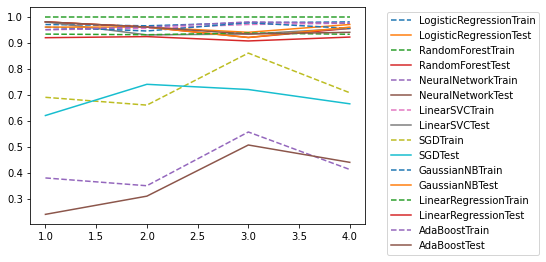

In [25]:
PlotResults(list_trials, dict_train_mean, dict_test_mean)

In [ ]:
# plt.legend(loc="upper left")
plt.show()

In [ ]:
def GenerateFaultScore():
    s = np.random.normal(0, 1)

In [ ]:
my_list = list(range(100))
for x in tqdm(my_list):
    pass